In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams['font.family']='NanumGothic'

In [3]:
# 데이터 구성하기
df_raw=pd.read_csv("/home/piai/Big Data/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
df_raw.shape

(320, 31)

In [5]:
# 총 변수 : 31개, 자료수 320개

In [6]:
df_raw.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,15.709703,20.323250,103.050469,807.735937,0.099358,0.123252,0.122144,0.066977,0.186772,0.062679,...,18.542406,27.225594,123.221625,1133.463438,0.137678,0.308713,0.352927,0.145487,0.305097,0.087156
std,3.745788,4.150729,25.835984,391.969297,0.014249,0.057207,0.084822,0.041732,0.027485,0.007190,...,5.182210,6.050052,35.960154,640.979627,0.023316,0.175225,0.214449,0.067292,0.069367,0.020076
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.026750,0.000000,0.000000,0.127400,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.085670,0.050360,0.000000,0.000000,0.156500,0.055040
25%,13.050000,17.460000,84.845000,523.900000,0.090240,0.081132,0.052770,0.029538,0.166900,0.057450,...,14.657500,23.275000,95.525000,653.525000,0.122675,0.180275,0.182950,0.090868,0.258700,0.073475
50%,15.125000,20.215000,100.100000,713.050000,0.098570,0.115300,0.110850,0.065265,0.184650,0.061445,...,17.730000,26.880000,118.850000,969.200000,0.138050,0.276950,0.339750,0.152700,0.295800,0.082640
75%,18.520000,22.500000,121.550000,1075.250000,0.108050,0.155650,0.169550,0.091777,0.202700,0.066705,...,22.420000,30.937500,148.850000,1538.500000,0.151200,0.405675,0.483675,0.197100,0.328125,0.097745
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [7]:
# 기술통계량 확인

In [9]:
# 결측치 확인
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [ ]:
# 결측치 확인 결과, 결측치 없음. 

In [155]:
# 목표변수 diagnosis 데이터 구성
df_raw_x=df_raw.drop('diagnosis', axis=1)
df_raw_y=df_raw['diagnosis']

In [174]:
df_raw_y.head()

0    음성
1    양성
2    음성
3    양성
4    양성
Name: diagnosis, dtype: object

In [100]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [105]:
# 변수간 상관계수 확인
df_raw_x.corr().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
mean_radius,1.000,0.329,0.997,0.988,0.148,0.454,0.675,0.811,0.140,-0.307,...,0.959,0.272,0.955,0.931,0.071,0.297,0.470,0.697,0.076,-0.059
mean_texture,0.329,1.000,0.336,0.317,0.002,0.253,0.309,0.297,0.050,-0.051,...,0.362,0.901,0.370,0.343,0.130,0.299,0.332,0.312,0.095,0.152
mean_perimeter,0.997,0.336,1.000,0.986,0.191,0.513,0.721,0.844,0.184,-0.249,...,0.958,0.279,0.960,0.930,0.106,0.346,0.513,0.728,0.105,-0.011
mean_area,0.988,0.317,0.986,1.000,0.146,0.436,0.672,0.802,0.124,-0.294,...,0.949,0.250,0.946,0.946,0.061,0.268,0.444,0.665,0.042,-0.076
mean_smoothness,0.148,0.002,0.191,0.146,1.000,0.678,0.592,0.578,0.584,0.643,...,0.186,0.069,0.220,0.169,0.800,0.504,0.503,0.535,0.380,0.531
mean_compactness,0.454,0.253,0.513,0.436,0.678,1.000,0.890,0.812,0.670,0.625,...,0.479,0.264,0.546,0.441,0.569,0.851,0.826,0.802,0.511,0.681
mean_concavity,0.675,0.309,0.721,0.672,0.592,0.890,1.000,0.935,0.544,0.360,...,0.670,0.292,0.721,0.644,0.473,0.708,0.854,0.848,0.373,0.465
mean_concave_points,0.811,0.297,0.844,0.802,0.578,0.812,0.935,1.000,0.498,0.197,...,0.806,0.283,0.839,0.774,0.436,0.597,0.731,0.891,0.329,0.321
mean_symmetry,0.140,0.050,0.184,0.124,0.584,0.670,0.544,0.498,1.000,0.540,...,0.170,0.101,0.216,0.141,0.445,0.541,0.493,0.486,0.722,0.488
mean_fractal_dimension,-0.307,-0.051,-0.249,-0.294,0.643,0.625,0.360,0.197,0.540,1.000,...,-0.249,0.006,-0.190,-0.246,0.553,0.554,0.411,0.236,0.407,0.782


In [106]:
# 변수들 기술통계량 확인
df_raw_x.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


In [107]:
x_cols=df_raw_x.columns

In [108]:
# 주성분 분석을 하기 위해서 데이터 scaling - StandardScaler
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)
print("Scaled Data:\n {}".format(nd_scaled[:5].round(3)))
print("Shape:\n {}".format(nd_scaled.shape))

Scaled Data:
 [[-0.158 -0.879 -0.166 -0.233 -0.745 -0.479 -0.551 -0.628 -0.997 -0.393
  -0.693 -1.741 -0.65  -0.516 -0.499 -0.513 -0.671 -0.865 -0.592 -0.457
  -0.149 -1.156 -0.154 -0.225  0.491  0.139 -0.094 -0.302  0.526  0.511]
 [-1.313 -2.561 -1.329 -1.15  -0.24  -1.154 -1.143 -1.2   -1.774  0.184
  -0.995 -1.649 -1.003 -0.784  0.325 -1.023 -1.067 -1.361 -0.892 -0.801
  -1.342 -2.517 -1.38  -1.124  0.254 -1.046 -1.159 -1.48  -1.388 -0.507]
 [ 0.695 -0.421  0.603  0.596 -0.947 -0.675 -0.478 -0.212 -0.899 -1.174
  -0.734 -1.505 -0.715 -0.471 -1.419 -1.058 -0.936 -1.127 -1.099 -1.269
   0.535 -0.143  0.445  0.432 -0.613 -0.367  0.004  0.173  0.224 -0.887]
 [-0.211 -1.301 -0.256 -0.309 -1.292 -0.661 -0.788 -0.834 -0.659 -0.834
  -0.774 -1.593 -0.712 -0.572 -1.276 -0.594 -0.557 -0.841 -1.011 -0.684
  -0.263 -1.491 -0.313 -0.354 -1.339 -0.169 -0.177 -0.458 -0.524 -0.221]
 [-0.754 -1.738 -0.82  -0.746 -2.095 -1.505 -1.175 -1.326 -1.934 -0.957
  -1.055 -1.518 -1.008 -0.763 -0.761 -0.826 -0

In [109]:
# scale결과 대입
df_scaled=pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.158,-0.879,-0.166,-0.233,-0.745,-0.479,-0.551,-0.628,-0.997,-0.393,...,-0.149,-1.156,-0.154,-0.225,0.491,0.139,-0.094,-0.302,0.526,0.511
1,-1.313,-2.561,-1.329,-1.150,-0.240,-1.154,-1.143,-1.200,-1.774,0.184,...,-1.342,-2.517,-1.380,-1.124,0.254,-1.046,-1.159,-1.480,-1.388,-0.507
2,0.695,-0.421,0.603,0.596,-0.947,-0.675,-0.478,-0.212,-0.899,-1.174,...,0.535,-0.143,0.445,0.432,-0.613,-0.367,0.004,0.173,0.224,-0.887
3,-0.211,-1.301,-0.256,-0.309,-1.292,-0.661,-0.788,-0.834,-0.659,-0.834,...,-0.263,-1.491,-0.313,-0.354,-1.339,-0.169,-0.177,-0.458,-0.524,-0.221
4,-0.754,-1.738,-0.820,-0.746,-2.095,-1.505,-1.175,-1.326,-1.934,-0.957,...,-0.951,-1.935,-0.998,-0.870,-1.784,-1.109,-1.094,-1.367,-1.071,-0.898


In [110]:
# scale한 결과 기술통계량 확인
df_scaled.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,...,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-2.144,-2.561,-2.137,-1.629,-3.284,-1.690,-1.442,-1.607,-2.164,-1.772,...,-1.906,-2.517,-1.914,-1.422,-2.234,-1.477,-1.648,-2.165,-2.146,-1.602
25%,-0.711,-0.691,-0.706,-0.725,-0.641,-0.737,-0.819,-0.899,-0.724,-0.728,...,-0.751,-0.654,-0.771,-0.750,-0.645,-0.734,-0.794,-0.813,-0.670,-0.683
50%,-0.156,-0.026,-0.114,-0.242,-0.055,-0.139,-0.133,-0.041,-0.077,-0.172,...,-0.157,-0.057,-0.122,-0.257,0.016,-0.182,-0.062,0.107,-0.134,-0.225
75%,0.751,0.525,0.717,0.684,0.611,0.567,0.560,0.595,0.580,0.561,...,0.749,0.614,0.714,0.633,0.581,0.554,0.611,0.768,0.332,0.528
max,3.316,4.574,3.313,4.327,4.501,3.889,3.597,3.221,4.272,4.842,...,3.382,3.694,3.564,4.876,3.648,4.283,3.816,2.166,5.179,6.004


In [111]:
# StandardScaler을 통해 진행하였으므로, 평균은 0, 표준편차는 1

In [116]:
# 주성분 분석
# n_components=5: 주성분 1(Prin1) ~ 주성분 7(Prin7) 생성 및 저장
pca=PCA(n_components=7)
nd_pca=pca.fit_transform(df_scaled)

print("PCA Data:\n {}".format(nd_pca[:5]))
print("Shape:\n {}".format(nd_pca.shape))

PCA Data:
 [[-2.00389702 -0.25805811 -1.84890296 -1.31467512  0.62472622  0.78945168
   0.13210868]
 [-5.84906746  0.21164764 -0.16808736 -2.95641861  1.83054388 -0.40516509
   0.32301073]
 [-1.54904826 -2.92566391 -2.44246291 -0.46586769  0.09042314  1.03234868
  -0.57968881]
 [-3.11249085 -1.32153438 -1.21958526 -1.44380449  0.69955798  1.98733066
   0.29057355]
 [-5.82479946 -1.67892363  0.05729344 -1.50169681  0.84564816  2.02590247
   0.24805198]]
Shape:
 (320, 7)


In [118]:
# 주성분 점수 저장(Prin1~Prin7, DataFrame형식) 및 확인

In [119]:
df_pca=pd.DataFrame(nd_pca, columns=["Prin1", "Prin2", "Prin3", "Prin4", 'Prin5', 'Prin6', 'Prin7'])
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_concave_points,worst_symmetry,worst_fractal_dimension,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.301949,0.525611,0.511081,-2.003897,-0.258058,-1.848903,-1.314675,0.624726,0.789452,0.132109
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.480312,-1.387506,-0.507149,-5.849067,0.211648,-0.168087,-2.956419,1.830544,-0.405165,0.323011
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.172850,0.223844,-0.886803,-1.549048,-2.925664,-2.442463,-0.465868,0.090423,1.032349,-0.579689
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.458230,-0.524077,-0.220788,-3.112491,-1.321534,-1.219585,-1.443804,0.699558,1.987331,0.290574
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-1.366747,-1.071301,-0.898278,-5.824799,-1.678924,0.057293,-1.501697,0.845648,2.025902,0.248052


In [120]:
# 주성분 분석 통계량 저장 : 주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat=pd.DataFrame()
df_pca_stat['PrinNo']=[i for i in range(1,8)]
df_pca_stat['EigenValues']=pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.125,0.436,0.436
1,2,5.982,0.199,0.635
2,3,3.116,0.104,0.738
3,4,1.950,0.065,0.803
4,5,1.319,0.044,0.847
5,6,1.252,0.042,0.889
6,7,0.749,0.025,0.914


In [121]:
# 상관계수 기준(고유값>1) : 5개 (Prin1 ~ Prin5)
# 공분산 기준(고유값 누적비율>0.8) : 4개 (Prin1 ~ Prin4)

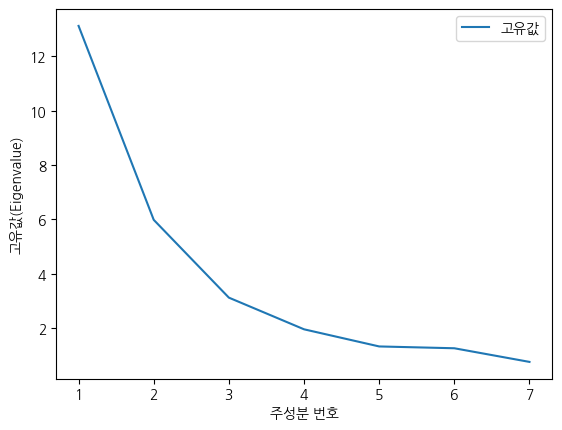

In [122]:
# Scree Plot
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label='고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='best')
plt.show()

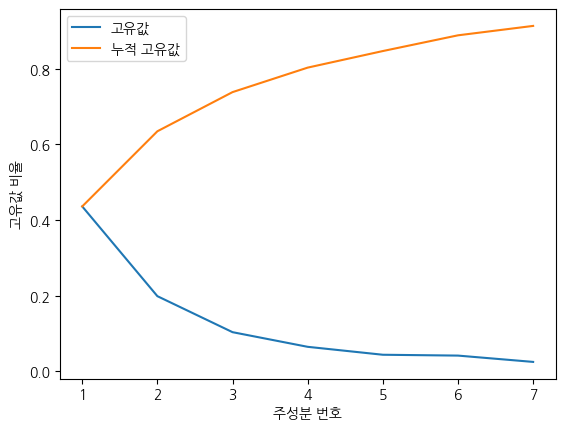

In [124]:
# 고유값 비율 그래프, 누적된 고유값 비율 그래프 생성 
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label='고유값')
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label='누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')
plt.show()

In [ ]:
# 따라서 최종저긍로 Prin1 ~ Prin5까지가 유의미한 주성분 값으로 파악 

In [130]:
# 주성분 분석 데이터의 변수 이름
x_cols=pd.DataFrame({'Feature':df_raw_x.columns})
df_eigenvector=pd.concat([x_cols, pd.DataFrame(pca.components_[:5].T*-1, \
                                               columns=['Prin1', 'Prin2', 'Prin3', 'Prin4', 'Prin5'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5
0,mean_radius,-0.214,0.238,0.026,0.026,-0.007
1,mean_texture,-0.110,0.046,0.038,-0.604,0.042
2,mean_perimeter,-0.225,0.218,0.024,0.029,-0.010
3,mean_area,-0.213,0.245,-0.002,0.040,-0.010
4,mean_smoothness,-0.151,-0.194,0.058,0.201,-0.037
5,mean_compactness,-0.240,-0.163,0.046,0.053,-0.024
6,mean_concavity,-0.261,-0.046,0.003,0.046,-0.060
7,mean_concave_points,-0.260,0.039,0.035,0.086,-0.008
8,mean_symmetry,-0.147,-0.197,0.047,0.138,0.428
9,mean_fractal_dimension,-0.076,-0.351,-0.000,0.080,-0.056


In [132]:
# 주성분 naming
# 고유값 확인 및 주성분 해석
# 1 주성분은 concavity와 concave point에서 강한 음의 연관성 확인
# 따라서 유방암 종양 형상의 모양이 오목할수록 음의 연관성이 있다고 판단
# 2 주성분은 radius, perimeter, area에서 양의 연관성 확인
# 따라서 종양의 크기가 양의 연관성이 있다고 판단함
# 3 주성분은 error 값(종양에서 나타나는 error값)에서 음의 연관성 확인
# 4 주성분은 texture(질감)에서 음의 연관성 확인
# 5 주성분은 symmetry(대칭성)에서 양의 연관성 확인

In [142]:
nd_pca=nd_pca[:,:5]

In [143]:
nd_pca.shape

(320, 5)

In [156]:
pca_columns=['pca_component_1', 'pca_component_2', 'pca_component_3', 'pca_component_4', 'pca_component_5']
df_pca_result=pd.DataFrame(nd_pca, columns=pca_columns)
df_pca_result['diagnosis']=df_raw_y

In [157]:
df_pca_result

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,diagnosis
0,-2.003897,-0.258058,-1.848903,-1.314675,0.624726,음성
1,-5.849067,0.211648,-0.168087,-2.956419,1.830544,양성
2,-1.549048,-2.925664,-2.442463,-0.465868,0.090423,음성
3,-3.112491,-1.321534,-1.219585,-1.443804,0.699558,양성
4,-5.824799,-1.678924,0.057293,-1.501697,0.845648,양성
...,...,...,...,...,...,...
315,3.203038,-0.265636,4.051026,1.690832,0.115799,음성
316,3.421096,0.860183,2.742605,2.127877,0.422649,음성
317,11.009894,1.856835,6.817009,-1.306914,-0.595707,음성
318,6.626788,2.463363,5.945138,1.983595,-1.872139,음성


In [ ]:
# 2차원 산점도 그리기

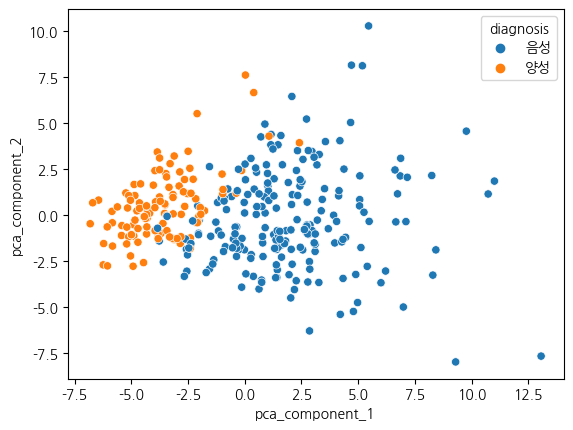

In [158]:
# 1 주성분과 2 주성분의 2차원 산점도 
# 음성과 양성의 경계가 뚜렷한 것으로 확인됨. 
sns.scatterplot(data=df_pca_result, x='pca_component_1', y='pca_component_2', hue='diagnosis')
plt.show()

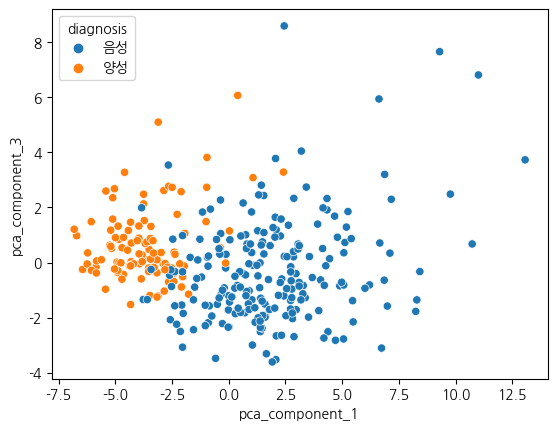

In [163]:
# 1 주성분과 3 주성분의 2차원 산점도 
# 음성과 양성의 경계가 뚜렷한 것으로 확인됨. 
sns.scatterplot(data=df_pca_result, x='pca_component_1', y='pca_component_3', hue='diagnosis')
plt.show()

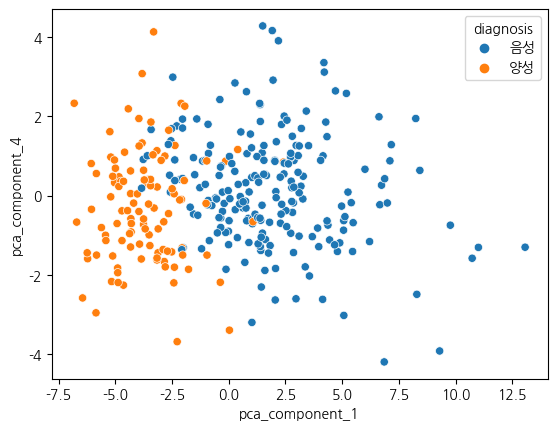

In [164]:
# 1 주성분과 4 주성분의 2차원 산점도 
# 음성과 양성의 경계가 비교적 뚜렷한 것으로 확인됨. 
sns.scatterplot(data=df_pca_result, x='pca_component_1', y='pca_component_4', hue='diagnosis')
plt.show()

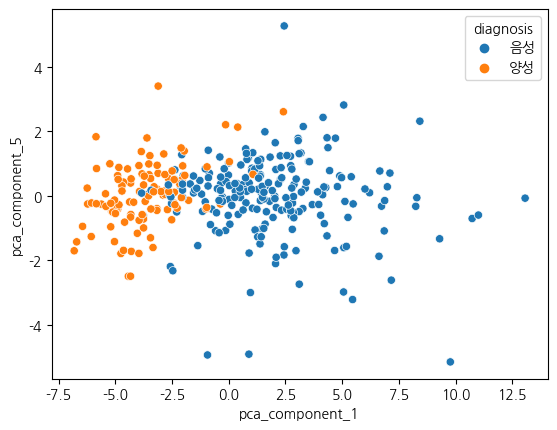

In [165]:
# 1 주성분과 5 주성분의 2차원 산점도 
# 음성과 양성의 경계가 불명확해짐. 
sns.scatterplot(data=df_pca_result, x='pca_component_1', y='pca_component_5', hue='diagnosis')
plt.show()

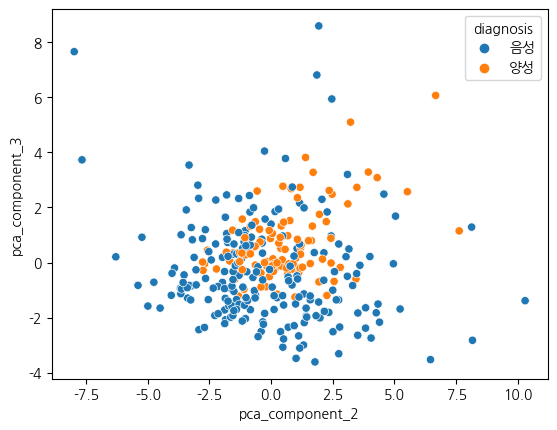

In [167]:
# 2 주성분과 3 주성분의 2차원 산점도 
# 음성과 양성의 경계가 불명확함.
sns.scatterplot(data=df_pca_result, x='pca_component_2', y='pca_component_3', hue='diagnosis')
plt.show()

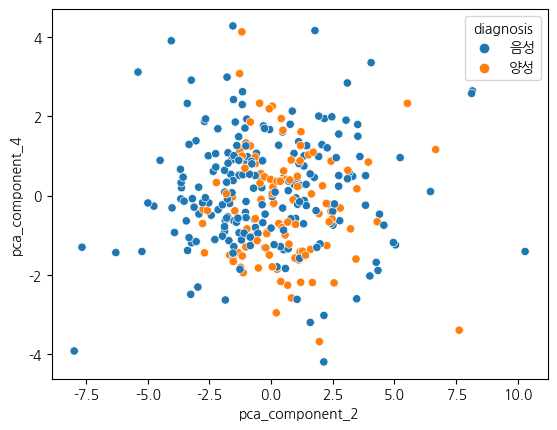

In [169]:
# 2 주성분과 4 주성분의 2차원 산점도 
# 음성과 양성의 경계가 불명확함.
sns.scatterplot(data=df_pca_result, x='pca_component_2', y='pca_component_4', hue='diagnosis')
plt.show()

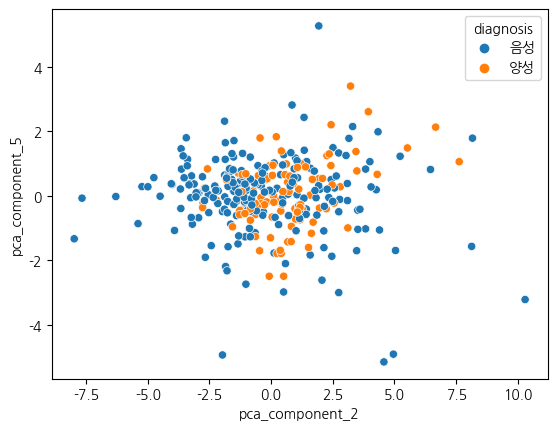

In [170]:
# 2 주성분과 5 주성분의 2차원 산점도 
# 음성과 양성의 경계가 불명확함.
sns.scatterplot(data=df_pca_result, x='pca_component_2', y='pca_component_5', hue='diagnosis')
plt.show()

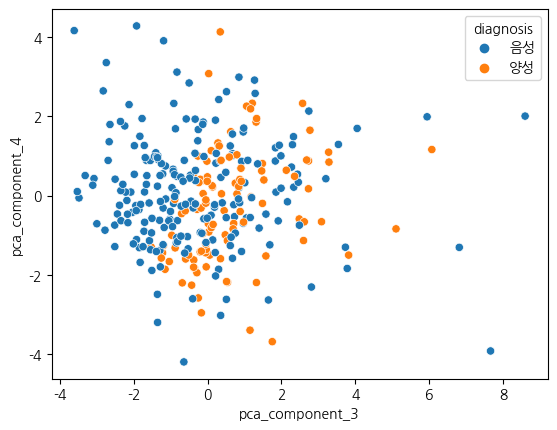

In [171]:
# 3 주성분과 4 주성분의 2차원 산점도 
# 음성과 양성의 경계가 불명확함.
sns.scatterplot(data=df_pca_result, x='pca_component_3', y='pca_component_4', hue='diagnosis')
plt.show()

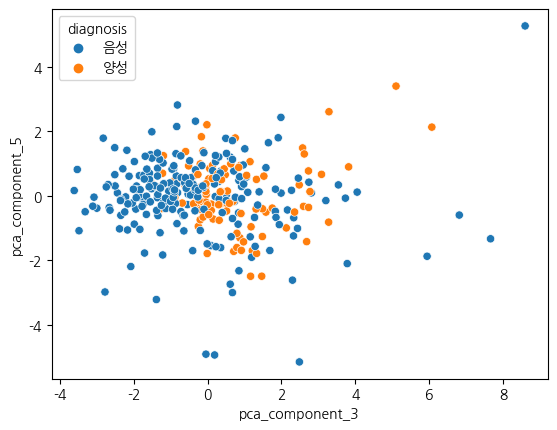

In [172]:
# 3 주성분과 5 주성분의 2차원 산점도 
# 음성과 양성의 경계가 불명확함.
sns.scatterplot(data=df_pca_result, x='pca_component_3', y='pca_component_5', hue='diagnosis')
plt.show()

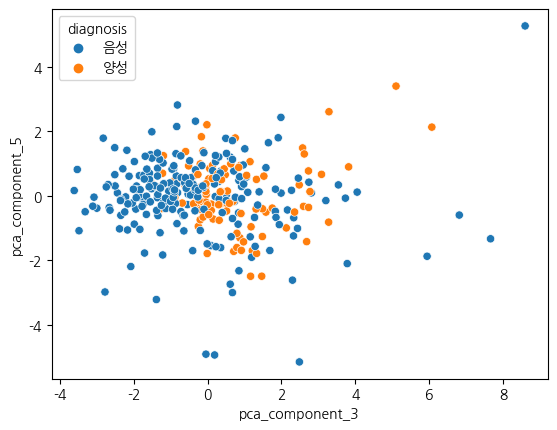

In [173]:
# 4 주성분과 5 주성분의 2차원 산점도 
# 음성과 양성의 경계가 불명확함.
sns.scatterplot(data=df_pca_result, x='pca_component_3', y='pca_component_5', hue='diagnosis')
plt.show()

In [ ]:
# 최종적으로 변수 31개에서, 1~5 주성분으로 차원을 축소하였으며 그 중 1주성분과 2주성분이 강한 영향인자임.